#Import Libraries

In [32]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets , transforms

## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise. 

Here is the list of all the transformations which come pre-built with PyTorch

1.   Compose
2.   ToTensor
3.   ToPILImage
4. Normalize
5. Resize
6. Scale
7. CenterCrop
8. Pad
9. Lambda
10. RandomApply
11. RandomChoice
12. RandomOrder
13. RandomCrop
14. RandomHorizontalFlip
15. RandomVerticalFlip
16. RandomResizedCrop
17. RandomSizedCrop
18. FiveCrop
19. TenCrop
20. LinearTransformation
21. ColorJitter
22. RandomRotation
23. RandomAffine
24. Grayscale
25. RandomGrayscale
26. RandomPerspective
27. RandomErasing

You can read more about them [here](https://pytorch.org/docs/stable/_modules/torchvision/transforms/transforms.html)

In [6]:
train_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,),(0.3081,)) #how do we get this normalizartion values ;)
])

test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,),(0.3081,))  #how do we get this normalizartion values ;)
])

# Dataset and Creating Train/Test Split

In [7]:
train = datasets.MNIST(root = '/content',train=True,download=True,transform=train_transforms)
test = datasets.MNIST(root = '/content',train=False,download=True,transform=train_transforms)


Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw




Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw




Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# Dataloader Arguments & Test/Train Dataloaders


In [8]:
!nvidia-smi

Tue Jun  8 09:30:39 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    29W /  70W |   1058MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [9]:
SEED = 1
# Cuda ?
cuda = torch.cuda.is_available()
print("Cuda Available?", cuda)

# For reproduciability (cpu)
torch.manual_seed(SEED)

if cuda:
  torch.cuda.manual_seed(SEED) # For reproduciability (gpu)

dataloader_args = dict(shuffle=True,batch_size=128,num_workers=4, pin_memory=True)

# train dataloader
train_loader = torch.utils.data.DataLoader(train,**dataloader_args)
test_loader = torch.utils.data.DataLoader(test,**dataloader_args)

Cuda Available? True


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: torch.Size([28, 60000, 28])
 - Tensor Shape: torch.Size([28, 60000, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([128, 1, 28, 28])
torch.Size([128])


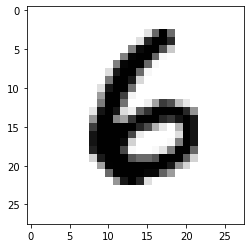

In [10]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train_data.shape)
print(' - Tensor Shape:', train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

## MORE

It is important that we view as many images as possible. This is required to get some idea on image augmentation later on

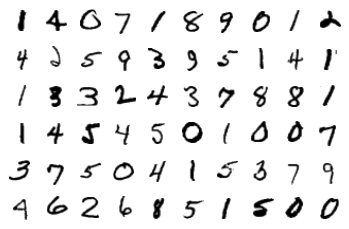

In [11]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# How did we get those mean and std values which we used above?

Let's run a small experiment

In [25]:
# simple transform without Normalization
simple_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                      #  transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])
exp = datasets.MNIST('./data', train=True, download=True, transform=simple_transforms)
exp_data = exp.train_data
exp_data = exp.transform(exp_data.numpy())

print('[Train]')
print(' - Numpy Shape:', exp.train_data.shape)
print(' - Tensor Shape:', exp.train_data.size())
print(' - min:', torch.min(exp_data))
print(' - max:', torch.max(exp_data))
print(' - mean:', torch.mean(exp_data))
print(' - std:', torch.std(exp_data))
print(' - var:', torch.var(exp_data))

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: torch.Size([60000, 28, 28])
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1307)
 - std: tensor(0.3081)
 - var: tensor(0.0949)




*   mean: tensor(0.1307)
*   std: tensor(0.3081)

Normalize the DS with this values.


# The model
Changed the max pool location to RF 5

Added 0.1 dropout to each conv layer instaed of some specific ones

Increased model capacity at the end (add layer after GAP)

In [33]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()   #input size (1,28,28)
        #INPUT BLOCK
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=16,kernel_size=(3,3),padding=0,bias=False),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Dropout(0.10)

        )   #output_size= (16,26,26) --> Global receptive_field = 3
        
        ##### CONV BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=16,out_channels=32,kernel_size=(3,3),padding=0,bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout(0.10)
        )   #output_size= (32,24,24) --> Global receptive_field = 5

        ##### TRANSITION BLOCK 1
        self.pool1 = nn.MaxPool2d(2,2) #output_size(32,12,12) --> Global receptive_field = 5
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=32,out_channels=10,kernel_size=(1,1),padding=0,bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        )   #output_size= (10,12,12) --> Global receptive_field = 5

        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=10,out_channels=16,kernel_size=(3,3),padding=0,bias=False),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Dropout(0.10)
        )   #output_size= (16,10,10) --> Global receptive_field = 7

        ##### CONV BLOCK 2
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=16,out_channels=16,kernel_size=(3,3),padding=0,bias=False),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Dropout(0.10)
        )   #output_size= (16,8,8) --> Global receptive_field = 9

        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=16,out_channels=16,kernel_size=(3,3),padding=0,bias=False),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Dropout(0.10)
        )   #output_size= (16,6,6) --> Global receptive_field = 11

        ##### OUTPUT BLOCK
        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=16,out_channels=16,kernel_size=(3,3),padding=1,bias=False),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Dropout(0.10)
        )   #output_size= (16,6,6) --> Global receptive_field = 13
        self.gap = nn.Sequential(
            nn.AvgPool2d(6,6)
        )   #output_size= (16,1,1) --> Global receptive_field = 13
        self.convblock8 = nn.Sequential(
            nn.Conv2d(in_channels=16,out_channels=10,kernel_size=(1,1),padding=0,bias=False),
        )   #output_size= (10,1,1) --> Global receptive_field = 13
        
        #output_size= (10,1,1)
        
        # self.convblock8 = nn.Sequential(
        #     nn.Conv2d(in_channels=10,out_channels=10,kernel_size=(7,7),padding=0,bias=False),
        #     #nn.BatchNorm2d(10), NEVER ADD BATCHNORM IN LAST LAYER!!
        #     #nn.ReLU()  NEVER IN LAST LAYER!!
        # )   #output_size= (10,1,1) --> Global receptive_field = 16 - ? NOT SURE

        # self.dropout = nn.Dropout(0.10)



    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.pool1(x)
        x = self.convblock3(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        x = self.convblock6(x)
        x = self.convblock7(x)
        x = self.gap(x)
        x = self.convblock8(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

# Model Params
Can't emphasize on how important viewing Model Summary is. 
Unfortunately, there is no in-built model visualizer :((, so we have to take external help

In [34]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
       BatchNorm2d-2           [-1, 16, 26, 26]              32
              ReLU-3           [-1, 16, 26, 26]               0
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 32, 24, 24]           4,608
       BatchNorm2d-6           [-1, 32, 24, 24]              64
              ReLU-7           [-1, 32, 24, 24]               0
           Dropout-8           [-1, 32, 24, 24]               0
         MaxPool2d-9           [-1, 32, 12, 12]               0
           Conv2d-10           [-1, 10, 12, 12]             320
      BatchNorm2d-11           [-1, 10, 12, 12]              20
             ReLU-12           [-1, 10, 12, 12]               0
           Conv2d-13           [-1, 16, 10, 10]           1,440
      BatchNorm2d-14           [-1

In [35]:
!nvidia-smi

Tue Jun  8 11:21:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    28W /  70W |   1208MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Training and Testing

We have added batchnorm and dropout. to make the traninng difficult


In [16]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model,device,train_loader,optimizer,epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx,(data,target) in enumerate(pbar):
    #get samples
    data,target = data.to(device),target.to(device)

    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # predict
    y_pred = model(data)
 
    # Calculate Loss
    loss = F.nll_loss(y_pred,target)
    train_losses.append(loss)   #appending to train loss

    #backprop
    loss.backward()
    optimizer.step()

    #update pbar-tqdm
    pred = y_pred.argmax(dim=1,keepdim=True) # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))


In [36]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(),lr=0.01,momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
  print("Epoch: ", epoch)
  train(model,device,train_loader,optimizer,epoch)
  test(model,device,test_loader)

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch:  0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Loss=0.19875241816043854 Batch_id=468 Accuracy=78.08: 100%|██████████| 469/469 [00:11<00:00, 41.80it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1053, Accuracy: 9735/10000 (97.35%)

Epoch:  1


Loss=0.06167301535606384 Batch_id=468 Accuracy=97.31: 100%|██████████| 469/469 [00:11<00:00, 42.62it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0540, Accuracy: 9855/10000 (98.55%)

Epoch:  2


Loss=0.11101239919662476 Batch_id=468 Accuracy=97.91: 100%|██████████| 469/469 [00:11<00:00, 42.11it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0450, Accuracy: 9864/10000 (98.64%)

Epoch:  3


Loss=0.02637944370508194 Batch_id=468 Accuracy=98.26: 100%|██████████| 469/469 [00:11<00:00, 42.38it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0342, Accuracy: 9896/10000 (98.96%)

Epoch:  4


Loss=0.017426494508981705 Batch_id=468 Accuracy=98.45: 100%|██████████| 469/469 [00:11<00:00, 41.37it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0320, Accuracy: 9906/10000 (99.06%)

Epoch:  5


Loss=0.019913461059331894 Batch_id=468 Accuracy=98.63: 100%|██████████| 469/469 [00:11<00:00, 42.35it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0283, Accuracy: 9914/10000 (99.14%)

Epoch:  6


Loss=0.022436780855059624 Batch_id=468 Accuracy=98.76: 100%|██████████| 469/469 [00:11<00:00, 42.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0312, Accuracy: 9903/10000 (99.03%)

Epoch:  7


Loss=0.017212044447660446 Batch_id=468 Accuracy=98.84: 100%|██████████| 469/469 [00:11<00:00, 42.26it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0245, Accuracy: 9919/10000 (99.19%)

Epoch:  8


Loss=0.02219928242266178 Batch_id=468 Accuracy=98.84: 100%|██████████| 469/469 [00:11<00:00, 42.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0246, Accuracy: 9918/10000 (99.18%)

Epoch:  9


Loss=0.04129710793495178 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:11<00:00, 42.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0286, Accuracy: 9903/10000 (99.03%)

Epoch:  10


Loss=0.025706442072987556 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:11<00:00, 42.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0244, Accuracy: 9926/10000 (99.26%)

Epoch:  11


Loss=0.008641090244054794 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:11<00:00, 41.60it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0210, Accuracy: 9929/10000 (99.29%)

Epoch:  12


Loss=0.009178509004414082 Batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [00:11<00:00, 41.54it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0214, Accuracy: 9928/10000 (99.28%)

Epoch:  13


Loss=0.007402435410767794 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:11<00:00, 41.97it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0206, Accuracy: 9924/10000 (99.24%)

Epoch:  14


Loss=0.017545370385050774 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:11<00:00, 42.50it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0217, Accuracy: 9927/10000 (99.27%)

Epoch:  15


Loss=0.040239620953798294 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:11<00:00, 41.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0222, Accuracy: 9924/10000 (99.24%)

Epoch:  16


Loss=0.041858967393636703 Batch_id=468 Accuracy=99.15: 100%|██████████| 469/469 [00:11<00:00, 42.29it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 9924/10000 (99.24%)

Epoch:  17


Loss=0.021776294335722923 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:11<00:00, 41.93it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0220, Accuracy: 9931/10000 (99.31%)

Epoch:  18


Loss=0.02872217632830143 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:11<00:00, 42.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0195, Accuracy: 9935/10000 (99.35%)

Epoch:  19


Loss=0.004165015649050474 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:11<00:00, 42.40it/s]



Test set: Average loss: 0.0193, Accuracy: 9939/10000 (99.39%)



Text(0.5, 1.0, 'Test Accuracy')

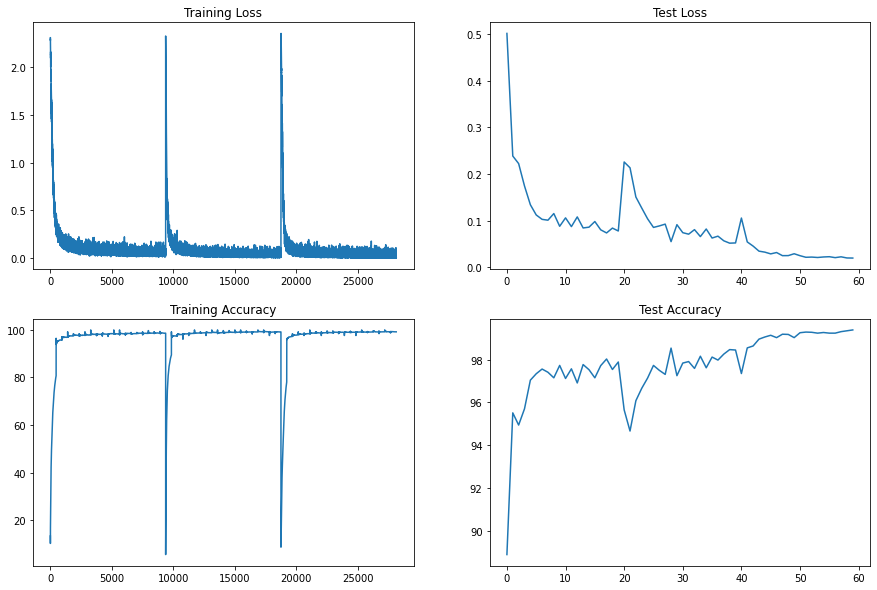

In [37]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")